# Demosaickin<font color='green'>g</font> with the help of li<font color='blue'>b</font><font color='red'>r</font>ary functions
For future reference (and for all <font color='red'>R</font><font color='green'>G</font><font color='blue'>B</font> channels) - but with [**almost**](#illustration-of-application-of-superposition) no educational charm [**what.so.ever**](#a-slighignificantly-more-re-educational-version)...

In [2]:
import sys, os; sys.path.insert(0, os.path.abspath('..'))

import cv2; import numpy as np; import auxiliary as aux

scheme = cv2.INTER_CUBIC
img = cv2.resize(cv2.cvtColor(cv2.imread('../images/insects/GrassHopper.png'), cv2.COLOR_BGR2RGB),
                 (512, 512),
                 interpolation = scheme)

## Moisaicking (Bayer CFA)
N, M, _ = img.shape
raws  = img[0:N:2, 0:M:2, 0], img[1:N:2, 1:M:2, 2], img[1:N:2, 0:M:2, 1], img[0:N:2, 1:M:2, 1]

## Illustration of application of **superposition**
Observe that we use linearity property to restore the green channel as if there are two separate sub green ones.
$$
\begin{bmatrix}
\color{red}{R} & \color{green}{G_I}\\
\color{green}{G_{II}} & \color{blue}{B}
\end{bmatrix}
=
\begin{bmatrix}
\color{red}{R} & 0\\
0 & 0
\end{bmatrix}
+
\underset{=\color{green}{G}}{\underbrace{\left[
\begin{bmatrix}
0 & \color{green}{G_I}\\
0 & 0
\end{bmatrix}
+
\begin{bmatrix}
0 & 0\\
\color{green}{G_{II}} & 0
\end{bmatrix}
\right]}}
+
\begin{bmatrix}
0 & 0\\
0 & \color{blue}{B}
\end{bmatrix}
$$

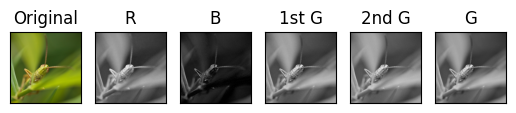

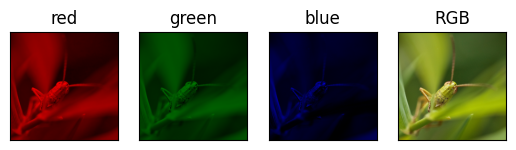

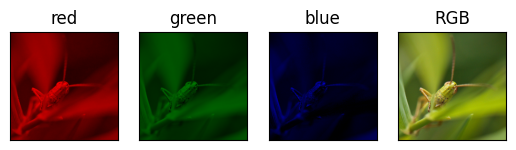

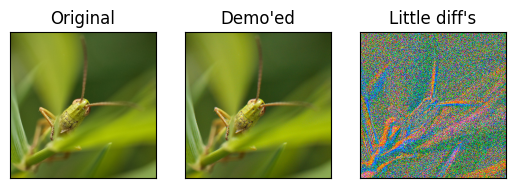

In [3]:
## De-mosaicking (de-Bayering by interpolation)
R, B, GI, GII = [cv2.resize(raw_channel, (M, N), interpolation = scheme) for raw_channel in raws]
G = GI//2 + GII//2

images = ('Original', 'R', 'B', '1st G', '2nd G', 'G')
aux.displayImages((img, R, B, GI, GII, G), images, grid = False)

rgb = np.dstack((R, G, B)); cc = ('red', 'green', 'blue')
aux.displayChannels((img, rgb), cc)

images = ('Original', 'Demo\'ed', 'Little diff\'s') # So to speak... https://youtu.be/ab7eVVG3I8s?t=43
aux.displayImages((img, rgb, rgb - img), images, grid = False)

## A **s[ligh|ignifican]tly** more re-educational version... 
Here, in turn, we re-use (so you don't have to but should anyway!) our own (and a bit majestic) interpolating routine (albeit for the **<font color='blue'>B</font> channel** only...).

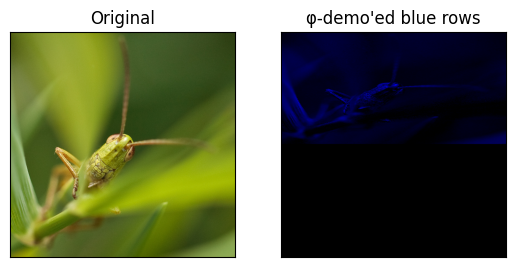

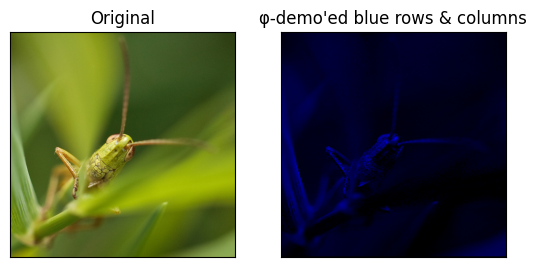

In [4]:
from interpolation import interpolate as Σ, ϕ #Π, Λ
from matplotlib.colors import LinearSegmentedColormap as lscm

# Linear interpolation
ψ = ϕ; name = ψ.__name__
blues = lscm.from_list('_', ['black', 'blue'])

blue = np.zeros((N, N))
# Rows first...
for m in range(M >> 1):
   blue[m, ...] = np.matrix(Σ(raws[1][m, ...], N, φ = ψ)).flat    # Matrix? Eclipses? Thingamajig!
aux.displayImages((img, blue),
                  ('Original', f'{name}-demo\'ed blue rows'),
                   cmp = blues, grid = False)
# ...then columns
for n in range(N):
   blue[:, n] = np.array(Σ(blue[:M >> 1, n], N, φ = ψ)).flat       # Array? Semicolons? Whatchamacallit!
aux.displayImages((img, blue),
                  ('Original', f'{name}-demo\'ed blue rows & columns'),
                   cmp = blues, grid = False)